-------------------------------LogisticRegression-----------------------------------
Accuracy Score for LogisticRegression: 0.8498249493274369
Time taken to complete training LogisticRegression model: (hh:mm:ss.ms) 0:00:00.188894
Confusion Matrix
[[3862  283]
 [ 532  750]]
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      4145
          1       0.73      0.59      0.65      1282

avg / total       0.84      0.85      0.84      5427



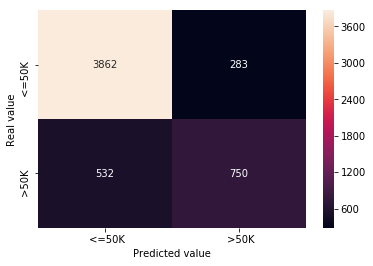

AUC Accuracy for LogisticRegression is : 0.758374185389611


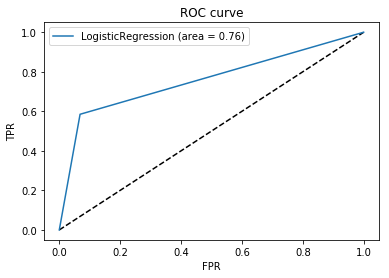

-------------------------------DecisionTree-----------------------------------
Accuracy Score for DecisionTree: 0.8063386769854431
Time taken to complete training DecisionTree model: (hh:mm:ss.ms) 0:00:00.145915
Confusion Matrix
[[3619  526]
 [ 525  757]]
             precision    recall  f1-score   support

          0       0.87      0.87      0.87      4145
          1       0.59      0.59      0.59      1282

avg / total       0.81      0.81      0.81      5427



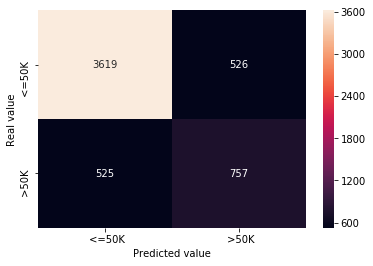

AUC Accuracy for DecisionTree is : 0.7317918699860178


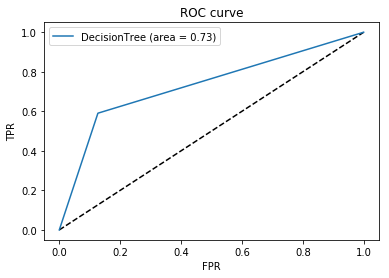

-------------------------------KNN-----------------------------------
Accuracy Score for KNN: 0.8422701308273448
Time taken to complete training KNN model: (hh:mm:ss.ms) 0:00:02.862366
Confusion Matrix
[[3973  172]
 [ 684  598]]
             precision    recall  f1-score   support

          0       0.85      0.96      0.90      4145
          1       0.78      0.47      0.58      1282

avg / total       0.84      0.84      0.83      5427



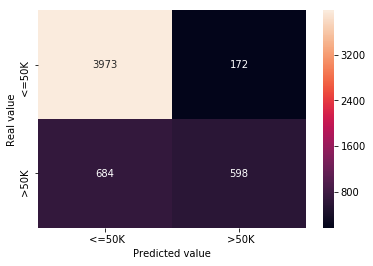

AUC Accuracy for KNN is : 0.7124814401502477


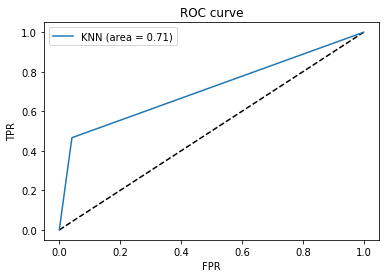

-------------------------------SVC-----------------------------------
Accuracy Score for SVC: 0.8618021006080707
Time taken to complete training SVC model: (hh:mm:ss.ms) 0:00:11.863224
Confusion Matrix
[[3927  218]
 [ 532  750]]
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      4145
          1       0.77      0.59      0.67      1282

avg / total       0.86      0.86      0.85      5427



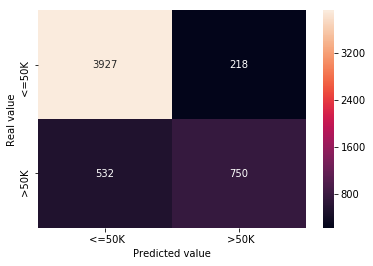

AUC Accuracy for SVC is : 0.7662149574040863


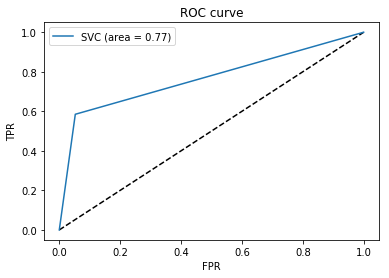

-------------------------------Naive-----------------------------------
Accuracy Score for Naive: 0.8013635526073337
Time taken to complete training Naive model: (hh:mm:ss.ms) 0:00:00.079952
Confusion Matrix
[[3363  782]
 [ 296  986]]
             precision    recall  f1-score   support

          0       0.92      0.81      0.86      4145
          1       0.56      0.77      0.65      1282

avg / total       0.83      0.80      0.81      5427



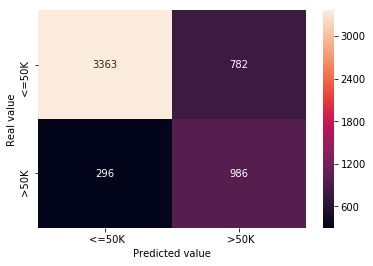

AUC Accuracy for Naive is : 0.790224863518063


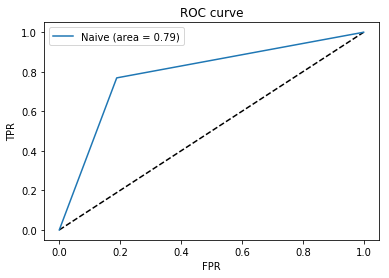

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
import datetime as dt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,roc_curve, auc
from datetime import datetime

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import MinMaxScaler,Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.decomposition import PCA
####################################################################
#clean data
def clean_data(infile_name,outfile_name):

	trainData = pd.read_csv(infile_name)

	trainData.rename(columns={'f1':'age', 'f2':'workclass', 'f3':'fnlwgt', 'f4':'education', 'f5':'education-num',\
						  'f6':'marital-status', 'f7':'occupation', 'f8':'relationship' , 'f9': 'race', 'f10': 'sex' ,\
						  'f11': 'capital-gain', 'f12':'capital-loss', 'f13':'hours-per-week', 'f14': 'native-country',\
						  }, inplace= True)


	#---------------------------------------------------------------------
	attribute = 'workclass'
	def fill_in(x):
		if x == ' ?':
			output = ' Private'
			return output
		else:
			return x
			
	trainData[attribute] =  trainData[attribute].apply(fill_in)
	# trainData[attribute].value_counts()

	attribute = 'fnlwgt'
	trainData.drop(['fnlwgt'], axis = 1 , inplace= True)
	#------------------------------------------------------------------
	attribute = 'education'
	def fill_in(x):
		output = ' HS-grad'
		if x == ' 9th':   
			return output
		elif x == ' 10th':
			return output
		elif x == ' 11th':
			return output
		elif x == ' 12th':
			return output
		else:
			return x
			
	trainData[attribute] =  trainData[attribute].apply(fill_in)
	#------------------------------------------------------------------

	attribute = 'education-num'
	trainData.drop(['education-num'], axis = 1 , inplace= True)
	#------------------------------------------------------------------
	attribute = 'marital-status'
	def fill_in(x):
		output =' Married'
		if x == ' Married-civ-spouse':   
			return output
		elif x == ' Married-spouse-absent':
			return output
		elif x == ' Married-AF-spouse':
			return output
		else:
			return x

	trainData[attribute] =  trainData[attribute].apply(fill_in)
	#--------------------------------------------------------------------
	attribute = 'occupation'
	trainData[attribute].value_counts()
	def f_mode (x):
		return x.value_counts().index[0]

	valid_dataframe = trainData[[attribute, 'workclass']].copy()
	temp = valid_dataframe.groupby(['workclass']).agg(f_mode).copy()

	def fill_in(x):
		output = ' no-job-before'
		if x['workclass'] == ' Never-worked':
			return output
		else:
			return x['occupation']
			
	trainData[attribute] =  trainData.apply(fill_in, axis = 1)

	def f_mode (x):
		return x.value_counts().index[0]

	valid_dataframe = trainData[[attribute, 'workclass']].copy()
	temp = valid_dataframe.groupby(['workclass']).agg(f_mode).copy()

	for i in trainData[trainData['occupation'] == ' ?'].index:
		try:
			temp_workclass = trainData.loc[i,'workclass']
			temp_occupation = temp.loc[temp_workclass,'occupation']
			trainData.loc[i, 'occupation'] = temp_occupation
		except:
			continue
			
	#----------------------------------------------------------
	attribute = 'native-country'
	def fill_in(x):
		if x == ' ?':
			output = ' United-States'
			return output
		elif x == 'Outlying-US(Guam-USVI-etc)':
			return output
		else:
			return x
			
	trainData[attribute] =  trainData[attribute].apply(fill_in)
	
	
	trainData.to_csv(outfile_name)
	
################################################################################
clean_data('adult.train_SMALLER.csv','clean_adult.train_SMALLER.csv')
clean_data('adult.test_SMALLER.csv','clean_adult.test_SMALLER.csv')

trainData = pd.read_csv('clean_adult.train_SMALLER.csv')
testData = pd.read_csv('clean_adult.test_SMALLER.csv')

trainData.drop(['Unnamed: 0'], axis =1 , inplace=True)
testData.drop(['Unnamed: 0'], axis =1 , inplace=True)

#-------------------------------------------------------------------------------
#get dummy
categorical_variable = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country' ]
for i in categorical_variable:
    tempDF = pd.get_dummies(trainData[i])
    trainData = pd.merge(trainData, tempDF, left_index= True, right_index= True)
    tempDF = pd.get_dummies(testData[i])
    testData = pd.merge(testData, tempDF, left_index= True, right_index= True)
    
for i in [' Armed-Forces' ,' Hungary',' Scotland']:
    trainData.drop(i, axis = 1 , inplace= True)
	
def codeLabel1(x):
    if x == ' <=50K':   
        return 0
    else:
        return 1
    
def codeLabel2(x):
    if x == ' <=50K.':   
        return 0
    else:
        return 1
trainData['label'] = trainData['label'].apply(codeLabel1)
testData['label'] = testData['label'].apply(codeLabel2)

trainData['Label'] = trainData['label']
testData['Label'] = testData['label']

drop_variables = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country','label']
for i in drop_variables:
    trainData.drop(i, axis = 1 , inplace= True)
    testData.drop(i, axis = 1 , inplace= True)
	
X_train = trainData.iloc[:,:-1]
y_train = trainData.iloc[:,-1]

X_test = testData.iloc[:,:-1]
y_test = testData.iloc[:,-1]


# #########################To find best K for KNN #########################


# def train_knn(algo,name,X_train,y_train,X_test,y_test):
#     algo.fit(X_train,y_train)
#     y_pred = algo.predict(X_test)
#     score = accuracy_score(y_test,y_pred)
#     return y_test,y_pred,score

# K = np.arange(1, 21, 1)
# acc = np.zeros(21)
# skf = StratifiedKFold(n_splits = 5, random_state=0,shuffle=False)
# for i in K:
#     accuracy_scores = []
#     for train_index, val_index in skf.split(X_train,y_train):
#         name = 'KNN'
#         X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[val_index]
#         y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[val_index]
#         clf_knn = KNeighborsClassifier(n_neighbors=i)
#         y_test_train,y_pred,acc_score = train_knn(clf_knn,name, X_train_cv,y_train_cv,X_test_cv,y_test_cv)
#         accuracy_scores.append(acc_score)
#     acc[i] = np.mean(accuracy_scores)
# i = np.argwhere(acc == np.max(acc))[0][0]
# print('The best k is ',str(K[i]))
# #########To find best C for SVM###############

# def train_SVM(algo,name,X_train,y_train,X_test,y_test):
#     algo.fit(X_train,y_train)
#     y_pred = algo.predict(X_test)
#     score = accuracy_score(y_test,y_pred)
#     return y_test,y_pred,score

# C = np.arange(1, 5, 0.5)

# acc = np.zeros(13)
# skf = StratifiedKFold(n_splits = 5, random_state=0,shuffle=False)
# for i in C:
#     accuracy_scores = []
#     for train_index, val_index in skf.split(X_train,y_train):
#         name = 'SVC'
#         X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[val_index]
#         y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[val_index]
#         clf_svc = SVC(C = i,class_weight=None,random_state=None)
#         y_test_train,y_pred,acc_score = train_SVM(clf_svc,name, X_train_cv,y_train_cv,X_test_cv,y_test_cv)
#         accuracy_scores.append(acc_score)
#     index = np.argwhere(C==i)
#     acc[index[0][0]] = np.mean(accuracy_scores)
# i = np.argwhere(acc == np.max(acc))[0][0]

# print('The best C is ',str(C[i]))



######## standarlize ####################

# # Normalization
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# #standardize testing data
# X_test = scaler.transform(X_test)

############### SMOTE ####################


# smote_enn=SMOTEENN(random_state=0)
# X_train,y_train=smote_enn.fit_sample(X_train,y_train)
# print(Counter(y_train))


############### Apply PCA########################
# pca = PCA(n_components=5).fit(X_train)

# X_train = pca.transform(X_train)
# # X_train = standarize(X_train_pca)
# X_test  = pca.transform(X_test)
# # X_test  = standarize(X_test_pca)



##################################################
    
#Train all with good parameters and compare the result
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier(n_neighbors=8)
clf_svc = SVC(C = 4)
clf_gnb = GaussianNB()
classifiers = ['LogisticRegression', 'DecisionTree','KNN', 'SVC', 'Naive']
models = {clf_logreg:'LogisticRegression', clf_tree:'DecisionTree', clf_knn: 'KNN', clf_svc: 'SVC', clf_gnb: 'Naive'}


def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    
    print(f"-------------------------------{name}-----------------------------------")
    print(f"Accuracy Score for {name}: {score}")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
AUC = []
def acc_res(y_test,y_pred,name):
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print(classification_report(y_test,y_pred))
    precision,recall,fscore,support=score(y_test,y_pred)
#     fscore = (fscore[0]+fscore[1])/2
#     print ('F-score   : {}'.format(fscore))


    l = [' <=50K', ' >50K']
    sns.heatmap(matrix,annot=True, fmt="d" ,xticklabels=l, yticklabels=l)
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()
    fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr_rf_lm, tpr_rf_lm)
    AUC.append(roc_auc)
    plt.plot([0, 1], [0, 1],'k--')
    print(f"AUC Accuracy for {name} is : {roc_auc}")
    plt.plot(fpr_rf_lm, tpr_rf_lm, label=f'{name} (area = %0.2f)'% roc_auc)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    
time=[]    
def main(models):

    accuracy_scores = []
    for algo,name in models.items():
        start_time = datetime.now()
        elapsed_time = datetime.now() - start_time
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        run_time = datetime.now() - start_time
        time.append(run_time)
        print(f"Time taken to complete training {name} model: (hh:mm:ss.ms) {run_time}")
        acc_res(y_test_train,y_pred,name)
        accuracy_scores.append(acc_score)
    return accuracy_scores

accuracy_scores = main(models) 
# len(classifiers)


In [7]:
pd.DataFrame(accuracy_scores,index = classifiers,columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score', ascending = False)


,Accuracy Score
SVC,0.861802
LogisticRegression,0.849825
KNN,0.842270
DecisionTree,0.806339
Naive,0.801364


In [8]:
pd.DataFrame(AUC,index = classifiers,columns = ['AUC Score']).sort_values(by = 'AUC Score', ascending = False)


,AUC Score
Naive,0.790225
SVC,0.766215
LogisticRegression,0.758374
DecisionTree,0.731792
KNN,0.712481


In [9]:
pd.DataFrame(time,index = classifiers,columns = ['Time']).sort_values(by = 'Time', ascending = False)

,Time
SVC,00:00:11.863224
KNN,00:00:02.862366
LogisticRegression,00:00:00.188894
DecisionTree,00:00:00.145915
Naive,00:00:00.079952
